# Cole Southard

In [54]:
import matplotlib.pyplot as plt

# 1 - Reading Star File

In [ ]:
coordinates = {}
brightness = {}

def read_star_file(file):
    """
    Reads file and creates the coordinate and brightness dictionaries.
    
    Parameters: name of stars text file

    Returns: None
    """
    stars = open(file, 'r')
    for line in stars:
        columns = line.strip().split()
        x = float(columns[0])
        y = float(columns[1])
        hdn = columns[3]
        mag = float(columns[4])
        coordinates[hdn] = (x, y)
        brightness[hdn] = 10 * (10 ** -(mag/2.512))
    stars.close()

# 2 - Plotting the Stars

In [56]:
def plot_stars(ax, coords, bright):
    """
    Plot stars on a scatter plot.
    
    Parameters:
    - ax: matplotlib axes object
    - coords: dictionary with HDN IDs as keys and (x,y) coordinate tuples as values
    - bright: dictionary with HDN IDs as keys and brightness values as values
    
    Returns: None
    """
    x_coords = [coords[hdn][0] for hdn in coords]
    y_coords = [coords[hdn][1] for hdn in coords]
    sizes = [bright[hdn] for hdn in coords]  
    
    ax.scatter(x_coords, y_coords, sizes, c='white')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_facecolor('black')
    ax.axis('equal')

# 3 - Plotting the Constellations

In [57]:
color_list = ["red", "orange", "yellow", "green", "blue", "lime", "indigo", "violet"]

def plot_constellations(ax, coords, file):
    """
    Plots constellations on the scatter plot, including a legend.

    Parameters:
    - ax: matplotlib axes object
    - coords: dictionary with HDN IDs as keys and (x,y) coordinate tuples as values
    - file: name of constellations text file

    Returns: None
    """
    constellations = open(file, 'r')
    colorIndex = 0
    for line in constellations:
        name = line.strip()
        num_lines = int(constellations.readline().strip())
        ax.plot([], [], color=color_list[colorIndex], label=name)

        for i in range(num_lines):
            star_ids = constellations.readline().strip().split()
            start_id = star_ids[0]
            end_id = star_ids[1]
            
            start_x, start_y = coords[start_id]
            end_x, end_y = coords[end_id]
                
            ax.plot([start_x, end_x], [start_y, end_y], color=color_list[colorIndex])
        
        colorIndex += 1
    
    constellations.close()

# 4 - Execute

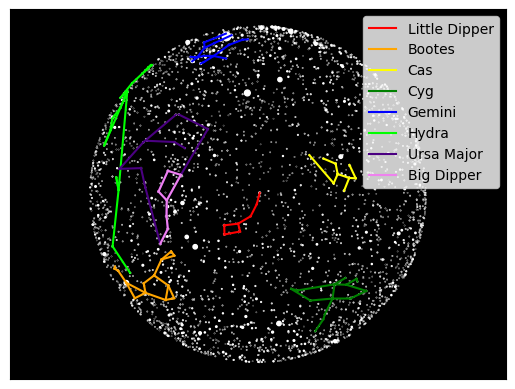

In [58]:
fig, ax = plt.subplots()
read_star_file('stars.txt')
plot_stars(ax,coordinates,brightness)
plot_constellations(ax, coordinates, 'constellations.txt')
plt.legend(loc='upper right')
plt.show()